/Users/nikolay/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


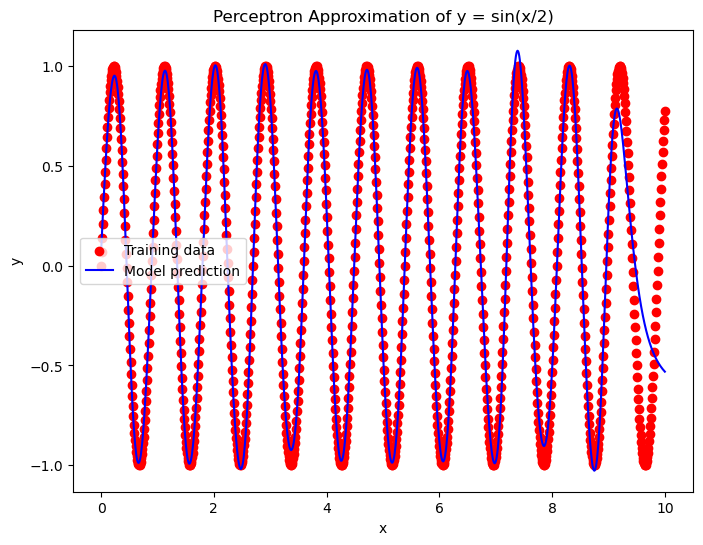

Mean Squared Error: 0.951378519873619


In [151]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor


def generate_data(n_samples=1000):
    X = np.linspace(0, 10, n_samples).reshape(-1, 1)
    y = np.sin(X * 7)
    return X, y


X_train, y_train = generate_data()
X_test, y_test = generate_data(n_samples=50)

# best - lbfgs
model = MLPRegressor(
    hidden_layer_sizes=(50, 50, 20),  
    activation='tanh',  
    solver='lbfgs',
    alpha=0.1, 
    max_iter=5000,
    early_stopping=False,
    validation_fraction=0.15
)

model.fit(X_train, y_train.ravel())

# Plot training data and model prediction
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='red', label='Training data')
plt.plot(X_train, model.predict(X_train), color='blue', label='Model prediction')
plt.title('Perceptron Approximation of y = sin(x/2)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Evaluate on test data
y_pred = model.predict(X_test)
mse = np.mean((y_test - y_pred)**2)
print(f"Mean Squared Error: {mse}")
# посмотреть метод оптимизации
# основан на метде гауса ньютона метод второго порядка